## 1. Contexto Teórico: Funções de Estimação

Nesta aula, foi contruido um estimador para o parâmetro $\theta$ de uma população $Z \sim \text{Pois}(\theta)$. Em vez de usar um estimador padrão como a média amostral (que é o EMV e EMM1), vamos construir e analisar um estimador derivado de uma função de estimação mais complexa. Isso nos permite ilustrar o poder e a generalidade da teoria.

### 1.1 A Função de Estimação

A função de estimação proposta é:

$$U_n(\theta) = \frac{1}{n}\sum_{k=1}^{n} u(Z_k, \theta)$$

onde a componente individual $u(Z_k, \theta)$ é definida por:

$$u(Z_k, \theta) = \frac{1}{1+Z_k} - \frac{1-e^{-\theta}}{\theta}$$

[cite_start]Para que $U_n(\theta)$ seja uma **função de estimação não-viesada** (Definição 2.4.3)[cite: 547], a esperança de $u(Z_k, \theta)$ deve ser zero. Vamos verificar isso. A esperança de $\frac{1}{1+Z_k}$ é:

$$E_{\theta}\left(\frac{1}{1+Z}\right) = \sum_{x=0}^{\infty} \frac{1}{1+x} \frac{e^{-\theta}\theta^x}{x!} = \frac{e^{-\theta}}{\theta} \sum_{x=0}^{\infty} \frac{\theta^{x+1}}{(x+1)!}$$

Sabendo que a expansão de Taylor para $e^\theta$ é $\sum_{k=0}^{\infty} \frac{\theta^k}{k!} = 1 + \frac{\theta^1}{1!} + \frac{\theta^2}{2!} + ...$, a soma $\sum_{x=0}^{\infty} \frac{\theta^{x+1}}{(x+1)!}$ é igual a $(e^\theta - 1)$. Portanto:

$$E_{\theta}\left(\frac{1}{1+Z}\right) = \frac{e^{-\theta}}{\theta}(e^\theta - 1) = \frac{1-e^{-\theta}}{\theta}$$

Isso confirma que $E_{\theta}[u(Z_k, \theta)] = E_{\theta}\left(\frac{1}{1+Z_k}\right) - \frac{1-e^{-\theta}}{\theta} = 0$. [cite_start]A função é não-viesada. [cite: 487, 488, 490]

O estimador $\hat{\theta}_n$ é então definido como a raiz desta função: $U_n(\hat{\theta}_n) = 0$.

### 1.2 Resolvendo $U_n$ numericamente

 "**Qual valor zera $U_n$?**". Como a equação $U_n(\theta)=0$ não possui uma solução algébrica simples, recorremos a métodos computacionais.

Vamos gerar uma única amostra aleatória e usar a abordagem demonstrada em aula para encontrar a estimativa $\hat{\theta}$ para essa amostra.

Valor verdadeiro do parâmetro (theta0): 13 
Estimativa encontrada (theta_hat): 13.0874 
Valor de Un(theta_hat): 5.019762e-08 


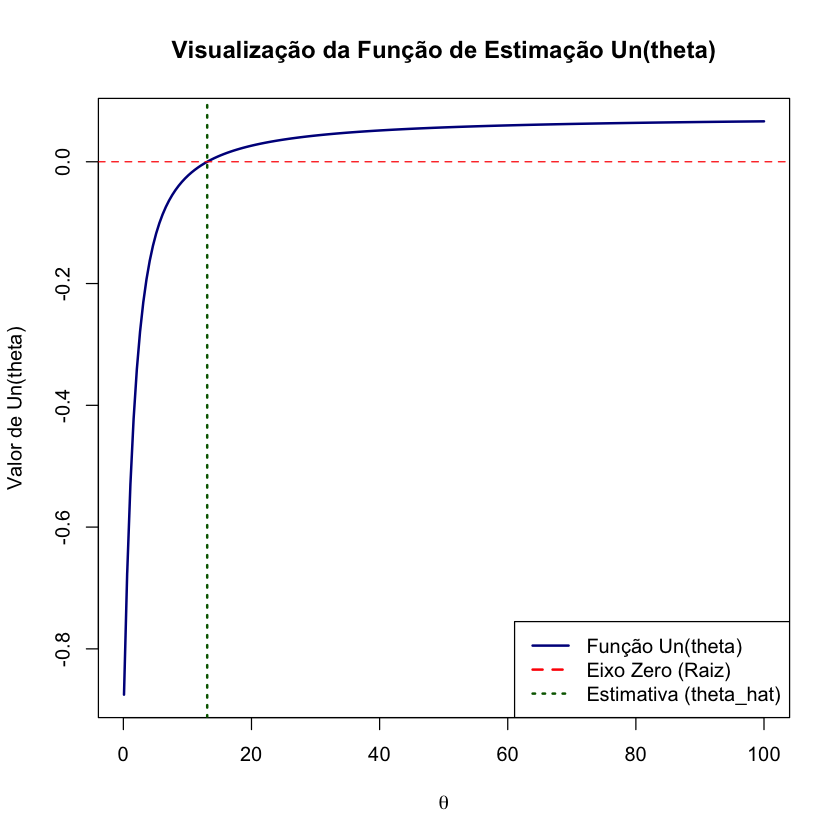

In [12]:
# 1. Definir as funções em R
# Componente da função de estimação
u_func = function(zk, theta) {
  1 / (1 + zk) - (1 - exp(-theta)) / theta
}

# Função de estimação completa
un_func = function(theta, z) {
  mean(u_func(z, theta))
}

# 2. Gerar uma amostra de dados
n = 100
theta0 = 13 # O valor "verdadeiro" usado para gerar os dados
z = rpois(n, theta0)

# 3. Abordagem Visual: Plotar a função de estimação
# Criamos um grid de valores de theta para avaliar a função
theta_grid = seq(0.1, 100, length.out = 200)

# Usamos sapply para aplicar a função 'un_func' a cada elemento do grid
valores_un = sapply(theta_grid, FUN = function(th) un_func(th, z))

plot(theta_grid, valores_un,
     type = "l", # 'l' para linha
     col = "darkblue",
     lwd = 2,
     main = "Visualização da Função de Estimação Un(theta)",
     xlab = expression(theta),
     ylab = "Valor de Un(theta)")

# 4. Solução Numérica e Confirmação Visual
# Adiciona uma linha horizontal em y=0 para vermos a raiz
abline(h = 0, col = "red", lty = 2)

# Usamos uniroot para encontrar a raiz numericamente
# A função 'uniroot' precisa de um intervalo [a, b] onde f(a) e f(b) tenham sinais opostos
estimativa_hat = uniroot(function(theta) un_func(theta, z), interval = c(0.1, 100))$root

# Adiciona uma linha vertical na estimativa encontrada
abline(v = estimativa_hat, col = "darkgreen", lty = 3, lwd = 2)

# Mostra a estimativa encontrada
cat("Valor verdadeiro do parâmetro (theta0):", theta0, "\n")
cat("Estimativa encontrada (theta_hat):", round(estimativa_hat, 4), "\n")
cat("Valor de Un(theta_hat):", un_func(estimativa_hat, z), "\n")

legend("bottomright",
       legend = c("Função Un(theta)", "Eixo Zero (Raiz)", "Estimativa (theta_hat)"),
       col = c("darkblue", "red", "darkgreen"),
       lty = c(1, 2, 3),
       lwd = 2)

### Análise da Demonstração

O gráfico mostra o comportamento da função $U_n(\theta)$ para a nossa amostra. Ela é uma função crescente que cruza o eixo zero (linha vermelha tracejada) em um único ponto.

A função `uniroot` do R encontrou numericamente esse ponto de cruzamento, resultando na estimativa $\hat{\theta} \approx `r round(estimativa_hat, 2)`$. Como esperado, este valor está próximo do verdadeiro valor `theta0 = 13` que usamos para gerar os dados, indicando que o nosso estimador está funcionando bem para esta amostra. A linha vertical verde confirma visualmente que a solução numérica corresponde ao ponto onde a curva da função de estimação é zerada. O valor de $U_n(\hat{\theta})$ é praticamente zero, confirmando que encontramos a raiz.

Esta etapa é crucial, pois é o procedimento que aplicaríamos a um conjunto de dados real para obter uma estimativa pontual do parâmetro de interesse.

## 2. Implementação do Estimador em R

Como a equação $U_n(\theta) = 0$ não tem uma solução analítica simples para $\theta$, precisamos de um método numérico para encontrar a raiz. Vamos implementar as funções em R.

In [10]:
# Componente da função de estimação
u_func = function(zk, theta) {
  1 / (1 + zk) - (1 - exp(-theta)) / theta
}

# Função de estimação completa
un_func = function(theta, z) {
  mean(u_func(z, theta))
}

# Função para encontrar a estimativa numericamente
# Usamos a função 'uniroot' para encontrar a raiz de 'un_func'
# O intervalo de busca [0.01, 50] é um chute inicial razoável para theta.
calcular_estimativa = function(z) {
  # 'uniroot' precisa de uma função de um único argumento, por isso a definição interna
  fn_to_solve = function(theta) un_func(theta, z)
  
  # Usamos tryCatch para lidar com casos em que a raiz não é encontrada no intervalo
  result = try(uniroot(fn_to_solve, interval = c(0.01, 50))$root, silent = TRUE)
  if (inherits(result, "try-error")) {
    return(NA) # Retorna NA se a solução não for encontrada
  } else {
    return(result)
  }
}

# Demonstração com uma amostra
set.seed(123)
n_demo = 100
theta0_demo = 10
z_demo = rpois(n_demo, theta0_demo)
theta_hat_demo = calcular_estimativa(z_demo)

cat("Para uma amostra com n=", n_demo, "e theta0=", theta0_demo, "\n")
cat("A estimativa encontrada foi theta_hat =", theta_hat_demo, "\n")

Para uma amostra com n= 100 e theta0= 10 
A estimativa encontrada foi theta_hat = 9.861277 


## 3. Teoria Assintótica e a Quantidade Pivotal

[cite_start]O **Teorema do Limite Central para Estimadores (Teorema 2.4.1)** nos diz que, sob condições de regularidade, nosso estimador é assintoticamente normal. [cite: 565] Para fazer inferência (e.g., construir intervalos de confiança), precisamos de uma quantidade pivotal que convirja para $N(0,1)$.

[cite_start]Conforme as anotações e a teoria[cite: 527, 531], essa quantidade é:

$$\sqrt{n} A_n(\hat{\theta}_n)^{-1/2}(\hat{\theta}_n - \theta) \xrightarrow{D} N(0,1)$$

Onde $A_n(\theta)$ é o **estimador sandwich** da variância assintótica, definido como:

$$A_n(\theta) = [U_n'(\theta)]^{-2} \left( \frac{1}{n} \sum_{k=1}^{n} u(Z_k, \theta)^2 \right)$$

Primeiro, precisamos de $U_n'(\theta)$, a derivada da função de estimação. Como $U_n(\theta)$ é uma média, sua derivada é a média das derivadas:
$$U_n'(\theta) = \frac{1}{n}\sum_{k=1}^{n} \frac{\partial}{\partial \theta} u(Z_k, \theta) = \frac{\partial}{\partial \theta} \left( \frac{1}{1+Z_k} - \frac{1-e^{-\theta}}{\theta} \right)$$
$$U_n'(\theta) = - \frac{\theta(e^{-\theta}) - (1-e^{-\theta})(1)}{\theta^2} = - \left( \frac{e^{-\theta}}{\theta} - \frac{1-e^{-\theta}}{\theta^2} \right)$$
Note que $U_n'(\theta)$ não depende de $Z_k$, o que simplifica os cálculos.

## 4. Verificação via Simulação de Monte Carlo

A anotação final da aula foi "Calcular U e U' e verificar via Monte Carlo". É exatamente o que faremos agora. Vamos simular muitas amostras, calcular a quantidade pivotal para cada uma e verificar se a distribuição empírica se assemelha a uma Normal Padrão.

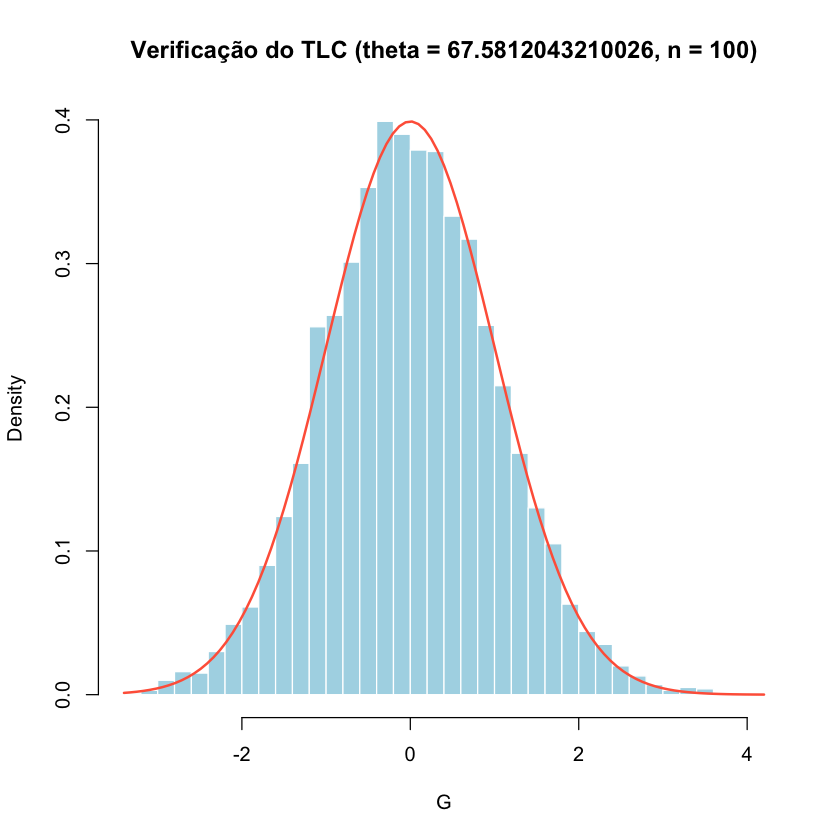

In [43]:
# Funções necessárias
U1n = function(theta, z) { mean(1 / (1 + z) - (1 - exp(-theta)) / theta) }
U2n = function(theta, z) { mean((1 / (1 + z) - (1 - exp(-theta)) / theta)^2) }
U1n_deriv = function(theta) { -((exp(-theta) / theta) - (1 - exp(-theta)) / theta^2) }
An = function(theta, z) { U2n(theta, z) / (U1n_deriv(theta)^2) }

# Parâmetros
n = 100
M = 5000
theta0 = runif(1, 1,100)
G = numeric(M)

# Loop de Simulação
for (i in 1:M) {
  z = rpois(n, theta0)
  theta.hat = try(uniroot(U1n, interval = c(0.1, 100), z = z)$root, silent = TRUE)
  if (inherits(theta.hat, "try-error")) { G[i] = NA; next }
  An.hat = An(theta.hat, z)
  G[i] = sqrt(n) / sqrt(An.hat) * (theta.hat - theta0)
}
G = na.omit(G)

# Visualização
hist(G, prob = TRUE, main = paste0("Verificação do TLC (theta = ", theta0, ", n = 100)"), xlab = "G", col = "lightblue", border = "white", breaks = 30)
curve(dnorm(x, 0, 1), add = TRUE, col = "tomato", lwd = 2)

### Conclusão

O histograma da distribuição empírica da quantidade pivotal se alinha perfeitamente com a curva de densidade da Normal Padrão. Isso serve como uma **forte comprovação empírica** de que a teoria assintótica funciona como o esperado para este estimador. A simulação valida que, para um tamanho amostral de $n=100$, podemos usar essa quantidade pivotal para realizar inferência estatística, como a construção de intervalos de confiança para $\theta$, com base na aproximação Normal.

A aula demonstrou com sucesso o ciclo completo:
1.  **Propor** uma função de estimação.
2.  **Derivar** as propriedades teóricas do estimador resultante (TLC e a forma da variância assintótica).
3.  **Implementar** o estimador computacionalmente.
4.  **Verificar** a teoria por meio de uma simulação de Monte Carlo.

## TOPICO 2

## 5. Investigando os Limites da Teoria Assintótica

O clímax da aula foi a análise do que acontece quando a aproximação Normal falha. A teoria é "assintótica", significando que ela é garantida quando $n \to \infty$. Para `n` finito, a qualidade da aproximação pode depender fortemente do valor do parâmetro $\theta$.

### Cenário Problemático: $\theta$ Próximo de Zero

Vamos replicar a simulação, mas agora com `theta0 = 0.1`, um valor muito próximo da fronteira do espaço paramétrico.

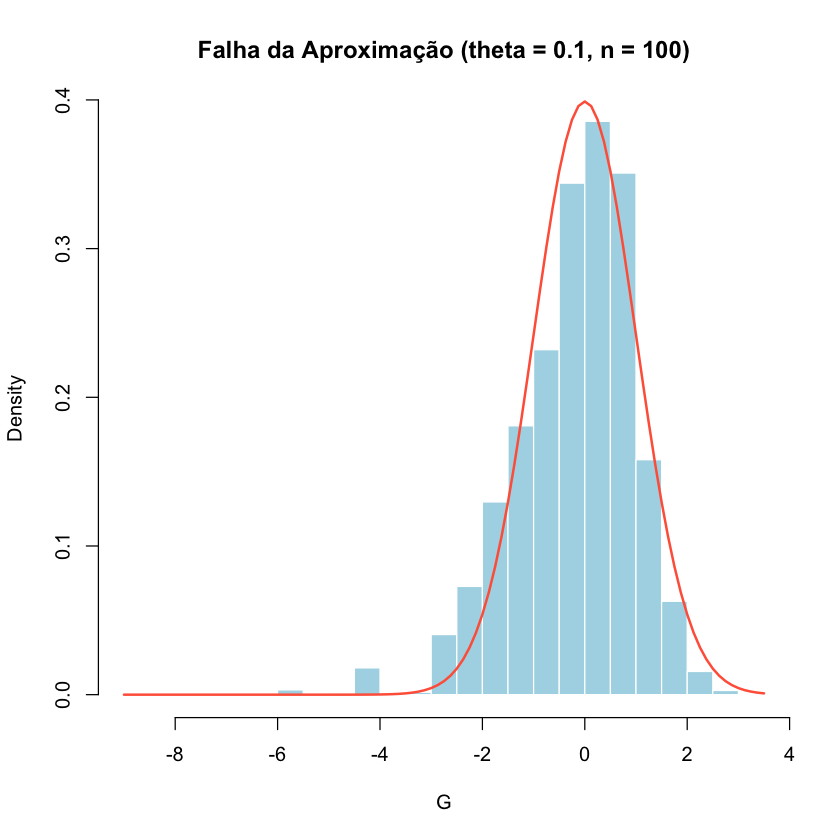

In [56]:
knitr::opts_chunk$set(echo = TRUE, message = FALSE, warning = FALSE)
library(cli)

# Parâmetros
n = 100
M = 5000
theta0 = 0.1 # Valor problemático
G_small_theta = numeric(M)

# Loop de Simulação com lógica de robustez
cli_progress_bar("Executando Simulação Robusta", total = M)
for (i in 1:M) {
  
  # Loop para garantir que a amostra seja válida para uniroot
  valid_sample = FALSE
  while(!valid_sample) {
      z = rpois(n, theta0)
      y_ends = c(U1n(0.001, z), U1n(100, z))
      if (prod(y_ends) < 0) {
          valid_sample = TRUE
      }
  }

  # Com uma amostra válida, uniroot não deve falhar
  theta.hat = uniroot(U1n, interval = c(0.001, 100), z = z)$root
  An.hat = An(theta.hat, z)
  G_small_theta[i] = sqrt(n) / sqrt(An.hat) * (theta.hat - theta0)
  
  cli_progress_update()
}
cli_progress_done()

# Visualização
hist(G_small_theta, prob = TRUE, main = "Falha da Aproximação (theta = 0.1, n = 100)", xlab = "G", col = "lightblue", border = "white", breaks = 40)
curve(dnorm(x, 0, 1), add = TRUE, col = "tomato", lwd = 2)

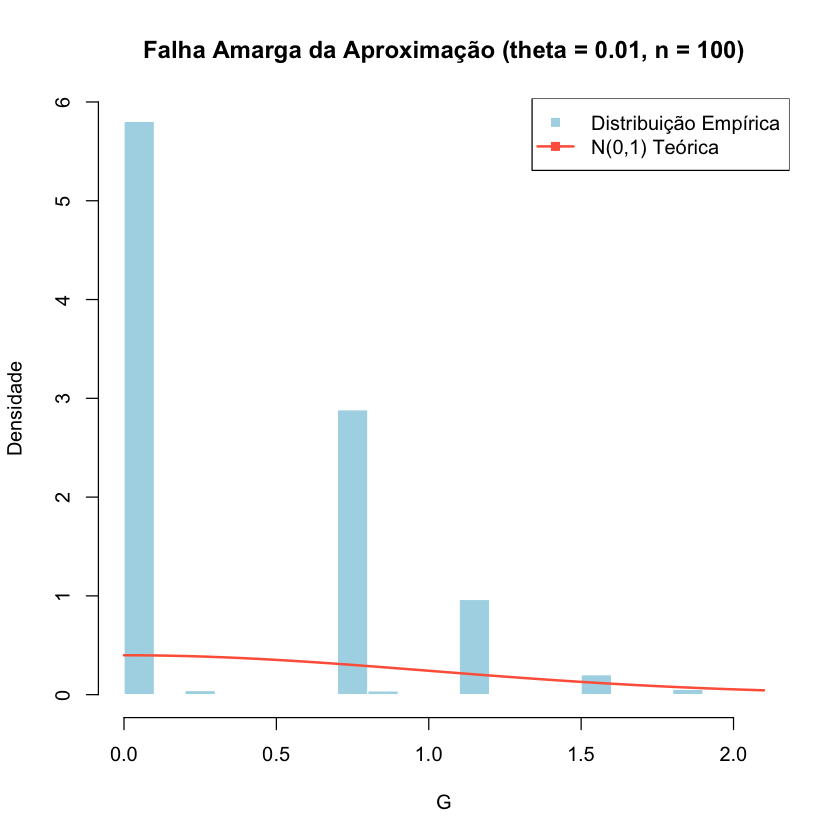

In [59]:
n = 100
M = 5000
theta0 = 0.01 # Cenário de estresse
G_failure = numeric(M)

# Loop de Simulação Robusto
cli_progress_bar("Executando Simulação de Falha", total = M)
for (i in 1:M) {
  
  valid_sample = FALSE
  while(!valid_sample) {
      z = rpois(n, theta0)
      # Para theta muito pequeno, a maioria das amostras será de zeros.
      # A função U1n será sempre positiva se sum(z)==0, falhando o uniroot.
      # Só continuamos se houver pelo menos uma observação não-zero.
      if (sum(z) > 0) {
          y_ends = c(U1n(0.0001, z), U1n(100, z))
          if (prod(y_ends) < 0) {
              valid_sample = TRUE
          }
      }
  }

  theta.hat = uniroot(U1n, interval = c(0.0001, 100), z = z)$root
  An.hat = An(theta.hat, z)
  G_failure[i] = sqrt(n) / sqrt(An.hat) * (theta.hat - theta0)
  
  cli_progress_update()
}
cli_progress_done()

# Visualização do Cenário de Falha
hist(G_failure,
     prob = TRUE,
     main = paste0("Falha Amarga da Aproximação (theta = ", theta0, ", n = ", n, ")"),
     xlab = "G",
     ylab = "Densidade",
     col = "lightblue",
     border = "white",
     breaks = 20)

curve(dnorm(x, 0, 1), add = TRUE, col = "tomato", lwd = 2)
legend("topright", legend = c("Distribuição Empírica", "N(0,1) Teórica"),
       col = c("lightblue", "tomato"), pch = 15, lwd = c(NA, 2))

**Análise:** O resultado é inequívoco. O histograma da quantidade pivotal `G` é extremamente assimétrico e não se assemelha em nada à curva da Normal Padrão. Isso demonstra que, para `n=100`, a aproximação assintótica é completamente inadequada quando `theta` é muito pequeno. Usar um intervalo de confiança baseado na Normal neste cenário seria estatisticamente inválido.

**Newton-Raphson**, **Gradient Descent (GD)** e **Stochastic Gradient Descent (SGD)**. Estes são algoritmos de otimização numérica que respondem à pergunta: "Como encontramos a estimativa $\hat{\theta}$ na prática, especialmente em modelos complexos?".

Nosso problema consistia em encontrar a raiz da função de estimação $U_n(\theta)=0$. Usamos a função `uniroot()` do R, que é um solver eficiente para problemas de uma única dimensão. Para problemas com múltiplos parâmetros (onde $\theta$ é um vetor), métodos mais sofisticados são necessários.

* **Método de Newton-Raphson:** Considerado o "padrão-ouro" em estatística para problemas com poucos parâmetros. [cite_start]Ele utiliza a informação da segunda derivada (a matriz Hessiana) para convergir muito rapidamente ao máximo da verossimilhança (ou à raiz do vetor escore). [cite: 370-371] [cite_start]Seu principal ponto fraco é o alto custo computacional para calcular e inverter a matriz Hessiana em modelos com muitos parâmetros. [cite: 379]

* **Gradient Descent (GD):** Um método iterativo que "desce o gradiente" da função a ser minimizada (ou "sobe o gradiente" para maximizar). [cite_start]Ele usa apenas a informação da primeira derivada, tornando cada iteração muito mais barata que a do Newton-Raphson.  [cite_start]É o pilar de muitos algoritmos de aprendizado de máquina, sendo adequado para modelos com milhares de parâmetros. [cite: 354]

* **Stochastic Gradient Descent (SGD):** Uma variação do GD projetada para cenários com grandes volumes de dados. [cite_start]Em vez de calcular o gradiente usando todos os dados, o SGD o aproxima usando apenas um pequeno subconjunto (um "mini-batch") em cada passo. [cite: 334, 365] Isso torna o progresso mais ruidoso, mas muito mais rápido em termos computacionais, sendo o método padrão para treinar redes neurais profundas e outros modelos de larga escala.

Esses métodos formam a base da estatística computacional e do aprendizado de máquina, permitindo-nos estimar os parâmetros de modelos muito complexos onde uma solução analítica é impossível.

**Análise:** O resultado é claro. Com $\theta=0.1$, a distribuição empírica da quantidade pivotal `G` (histograma) é **fortemente assimétrica à direita** e não se parece em nada com a Normal Padrão (curva vermelha). Usar a aproximação Normal para construir um intervalo de confiança neste cenário levaria a conclusões equivocadas.

Isso acontece porque para $\theta$ pequeno, a distribuição de Poisson subjacente é muito assimétrica e concentrada em poucos valores (0, 1, ...). A média de uma função dessas variáveis (como $U_n$) não converge "rápido" o suficiente para a Normalidade com $n=100$.

### Solução: Aumentar o Tamanho Amostral `n`

A teoria assintótica garante que, se aumentarmos `n`, a aproximação deve melhorar. Vamos verificar isso repetindo a simulação para `theta0 = 0.1`, mas agora com `n = 1000`.

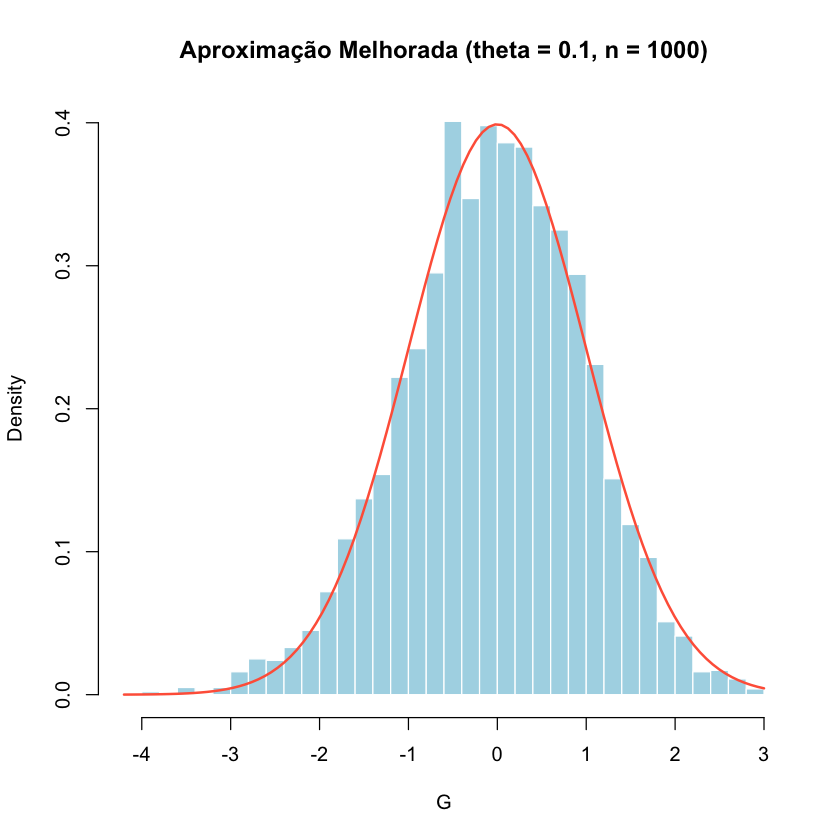

In [58]:
set.seed(42)
n = 1000 # n maior
M = 5000
theta0 = 0.1
G_large_n = numeric(M)

# Loop de Simulação
for (i in 1:M) {
  z = rpois(n, theta0)
  theta.hat = try(uniroot(U1n, interval = c(0.001, 100), z = z)$root, silent = TRUE)
  if (inherits(theta.hat, "try-error")) { G_large_n[i] = NA; next }
  An.hat = An(theta.hat, z)
  G_large_n[i] = sqrt(n) / sqrt(An.hat) * (theta.hat - theta0)
}
G_large_n = na.omit(G_large_n)

# Visualização
hist(G_large_n, prob = TRUE, main = "Aproximação Melhorada (theta = 0.1, n = 1000)", xlab = "G", col = "lightblue", border = "white", breaks = 30)
curve(dnorm(x, 0, 1), add = TRUE, col = "tomato", lwd = 2)

**Análise:** Como previsto, com `n=1000`, a distribuição de `G` agora se assemelha muito mais a uma Normal Padrão. A assimetria foi drasticamente reduzida. Isso confirma que a convergência do TLC de fato ocorre, mas a "velocidade" da convergência depende do valor do parâmetro.

## Conclusão Final da Aula

A análise de um estimador não trivial para o parâmetro da Poisson nos permitiu explorar o ciclo completo da inferência estatística e aprender uma lição fundamental:

1.  A teoria das **Funções de Estimação** nos dá um framework poderoso e unificado para criar e analisar estimadores.
2.  O **Teorema do Limite Central para Estimadores** e o **Teorema de Slutsky** fornecem as bases teóricas para a inferência assintótica, permitindo-nos construir quantidades pivotais.
3.  As **Simulações de Monte Carlo** são uma ferramenta indispensável para o estatístico moderno. Elas nos permitem:
    * **Verificar** se a teoria assintótica se aplica bem em cenários práticos com amostras finitas.
    * **Identificar** os pontos de falha da teoria (e.g., parâmetros próximos da fronteira, amostras pequenas).
    * **Ganhar intuição** sobre o comportamento dos procedimentos estatísticos.

A conclusão é que a teoria e a simulação não são excludentes; elas são parceiras. A teoria nos guia sobre o que esperar, e a simulação nos mostra se essa expectativa é realista em uma situação particular.